Code written by David Mohammadi, derived from Bowles (Ch. 2) & DataCamp


In [107]:
import matplotlib.pyplot as plt
from scipy import stats as stats
import pandas as pd
import numpy as np
import pylab
import sys

In [108]:
df = pd.read_csv(r"C:\Users\dmoha\Downloads\HY_Universe_corporate_bond.csv")
pd.set_option('display.max_columns', None)
df.head()

CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  Issued Amount Maturity Type  \
0   Nan                        Nan   12.00    405000000.0      CALLABLE   
1   BBB                        BB+    4.65    499285000.0   AT MATURITY   
2   BB+                         NR   10.63    460000000.0      CALLABLE   
3    WD                         NR    6.75    500000000.0      CALLABLE   
4    BB                        BB-    5.25    400000000.0      CALLABLE   

   Coupon Type  Maturity At Issue months                  Industry  \
0  PAY-IN-KIND                     60.87               Real Estate   
1        FIXED                    173.13                     Banks   
2        FIXED                     58.87  Household Products/Wares   
3        FIXED                     83.63  Household Products/Wares   
4        FIXED                     97.17  Household Products/Wares   

   LiquidityScore Months in JNK Months in HYG Months in Both IN_ETF  \
0       10.891365           Nan           Nan            Nan     No   
1       24.625486             0            33              0    Yes   
2       12.841557           Nan           Nan            Nan     No   
3       26.226355            43             0              0    Yes   
4       14.138395           Nan           Nan            Nan     No   

   LIQ SCORE  n_trades  volume_trades  total_median_size  total_mean_size  \
0   0.108914       301   2.640038e+08          1000000.0      877088.9535   
1   0.246255      2854   2.668630e+08            24000.0       93504.9054   
2   0.128416       434   2.814210e+08           875000.0      648435.4839   
3   0.262264      4975   1.163167e+09            26000.0      233802.4121   
4   0.141384       388   2.493420e+08           750000.0      642634.0206   

   n_days_trade  days_diff_max  percent_intra_dealer  percent_uncapped  \
0           128           1132              0.006645          0.292359   
1           614           1041              0.425018          0.974071   
2           183            439              0.115207          0.594470   
3           773           1227              0.426332          0.892462   
4           126            246              0.157216          0.690722   

   bond_type  Client_Trade_Percentage  weekly_mean_volume  \
0          5                 0.521595         3105926.765   
1          2                 0.337071         1721696.774   
2          5                 0.467742         4200313.433   
3          3                 0.212864         6321559.783   
4          5                 0.500000         5936714.286   

   weekly_median_volume  weekly_max_volume  weekly_min_volume  \
0             2000000.0         18980000.0            60000.0   
1             1160000.0         11197000.0             5000.0   
2             3520000.0         14000000.0            24000.0   
3             5487500.0         18459000.0            30000.0   
4             3305500.0         72760000.0            90000.0   

   weekly_mean_ntrades  weekly_median_ntrades  
0             3.541176                      1  
1            18.412903                      3  
2             6.477612                      1  
3            27.038043                      1  
4             9.238095                      1

In [109]:
#Sizing Up a New Data Set (Listing 2-1)
print("HY Corporate Bond Data Set (rows, columns):", end = " ")
shape = df.shape
print(shape)

HY Corporate Bond Data Set (rows, columns): (2721, 37)


In [110]:
#Determining the Nature of Attributes (Listing 2-2)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
column_type_df = df.dtypes
print(column_type_df)

CUSIP                          object
Ticker                         object
Issue Date                     object
Maturity                       object
1st Call Date                  object
Moodys                         object
S_and_P                        object
Fitch                          object
Bloomberg Composite Rating     object
Coupon                        float64
Issued Amount                 float64
Maturity Type                  object
Coupon Type                    object
Maturity At Issue months      float64
Industry                       object
LiquidityScore                float64
Months in JNK                  object
Months in HYG                  object
Months in Both                 object
IN_ETF                         object
LIQ SCORE                     float64
n_trades                        int64
volume_trades                 float64
total_median_size             float64
total_mean_size               float64
n_days_trade                    int64
days_diff_ma

In [111]:
#Summary Statistics (Listing 2-3 & 2-5)
#Descriptive statistics

summary = df.describe()
print(summary)

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

In [112]:
#Summary Statistics (Listing 2-3 & 2-5)
#Descriptive statistics for select categorical variables

#Moodys
print("Moodys grading occurences: ")
print("['Grade', 'Occurences']")
moodys_count, moodys_grade = np.unique(df['Moodys'], return_counts = True)
moodys_df = pd.DataFrame(moodys_grade, moodys_count)
print(moodys_df)


Moodys grading occurences: 
['Grade', 'Occurences']
             0
(P)B3        2
(P)Caa1      1
A1          32
A1 /*-       2
A2          13
A3           1
Aa1          1
Aa2         27
Aa3         46
Aaa         12
B1         165
B1 /*-       5
B1e          1
B2          89
B3         149
B3 /*+       6
Ba1        216
Ba1 /*+      8
Ba1 /*-      1
Ba1u         4
Ba2        163
Ba2 /*+     10
Ba2 /*-      1
Ba3        178
Ba3 /*-     10
Ba3e         2
Baa1        13
Baa1 /*+     1
Baa1e        1
Baa2        35
Baa3       124
Baa3 /*+     2
C            6
Ca          24
Caa1        80
Caa1 /*+     3
Caa1 /*-     1
Caa1u        1
Caa2        61
Caa3        13
Caa3 /*+     1
Cau          1
NR           9
Nan        161
WR        1039


Probability plot of LiquidityScore


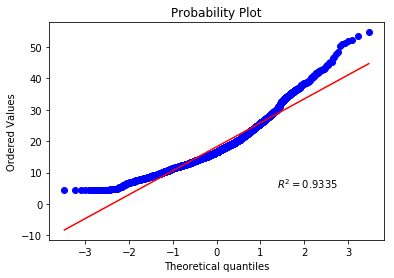

 
Probability plot of Weekly Mean Volume


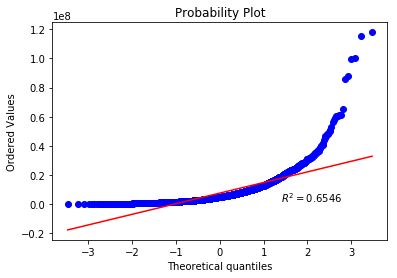

 
Probability plot of Weekly Median Volume


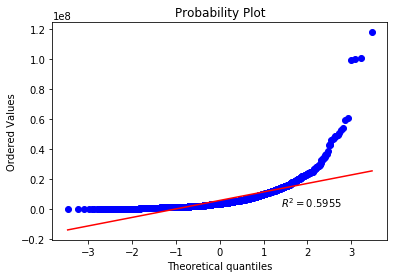

In [113]:
#Visualization of Outliers Using Quantile‐Quantile Plot (Listing 2-4)
print("Probability plot of LiquidityScore")
stats.probplot(df["LiquidityScore"], dist="norm", plot=pylab, rvalue=True)
pylab.show()
print(" ")

print("Probability plot of Weekly Mean Volume")
stats.probplot(df["weekly_mean_volume"], dist="norm", plot=pylab, rvalue=True)
pylab.show()
print(" ")

print("Probability plot of Weekly Median Volume")
stats.probplot(df["weekly_median_volume"], dist="norm", plot=pylab, rvalue=True)
pylab.show()

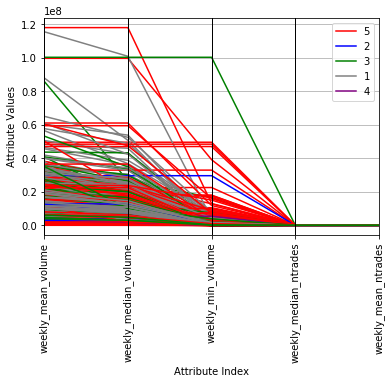

In [114]:
#Parallel Coordinates Graph for Real Attribute Visualization—linePlots.py (Listing 2-6)
#Code derived from: pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html

#Parrallel Coordinate Graph for weekly attributes in HY bonds dataset by Bond_Type
pd.plotting.parallel_coordinates(df, class_column='bond_type', cols=['weekly_mean_volume', 'weekly_median_volume', 'weekly_min_volume', 'weekly_median_ntrades', 'weekly_mean_ntrades'], 
                                 color=('red', 'blue', 'green', 'gray', 'purple', 'orange'))
plt.xticks(rotation=90)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

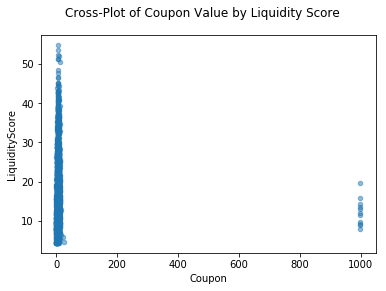

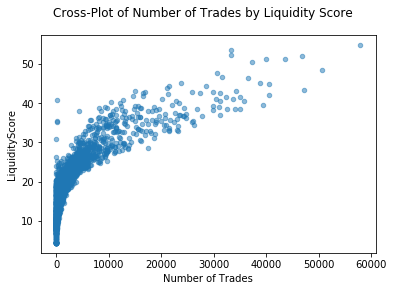

In [115]:
#Cross Plotting Pairs of Attributes (Listing 2-7)
data1 = df['Coupon']
data2 = df['LiquidityScore']
plt.xlabel("Coupon")
plt.ylabel("LiquidityScore")
plt.scatter(data1, data2, alpha=0.5, s = 20)
plt.suptitle('Cross-Plot of Coupon Value by Liquidity Score')
plt.show()


data3 = df['n_trades']
data4 = df['LiquidityScore']
plt.xlabel("Number of Trades")
plt.ylabel("LiquidityScore")
plt.scatter(data3, data4, alpha=0.5, s = 20)
plt.suptitle('Cross-Plot of Number of Trades by Liquidity Score')
plt.show()

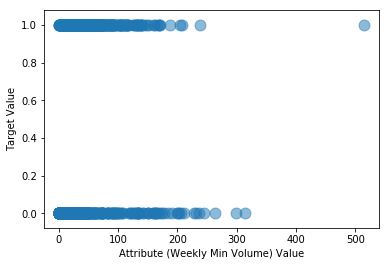

In [116]:
#Correlation between Classification Target and Real Attributes (Listing 2-8)

inetf_df = df['IN_ETF']
target = []
for i in range(2721):

    #assign 0 or 1 target value based on "M" or "R" labels
    # and add some dither

    if inetf_df[i] == "Yes":
        target.append(1.0)
    else:
        target.append(0.0)

    #plot 35th attribute with semi-opaque points
data5 = df.iloc[:,35]
plt.scatter(data5, target, alpha=0.5, s=120)

plt.xlabel("Attribute (Weekly Min Volume) Value")
plt.ylabel("Target Value")
plt.show()

In [117]:
#Pearson's Correlation Calculation (Listing 2-9)

#Code derived from datacamp
def pearsons(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearsons(df['n_trades'], df['LiquidityScore'])
print("Pearson's Correlation Coefficient between n_trades and LiquidityScore: ")
print(r)


Pearson's Correlation Coefficient between n_trades and LiquidityScore: 
0.803138522434631


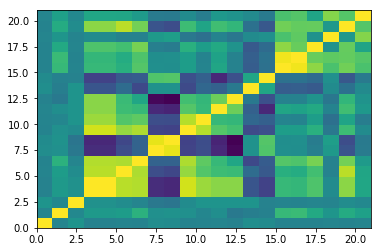

In [118]:
#Presenting Attribute Correlations Visually (Listing 2-10)

#Calculate correlations between attributed with real-values
corMat = (df.corr())

plt.pcolor(corMat)
plt.show()

In [119]:
print("My name is David Mohammadi")
print("My NetID is: dmohamm2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is David Mohammadi
My NetID is: dmohamm2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
